In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

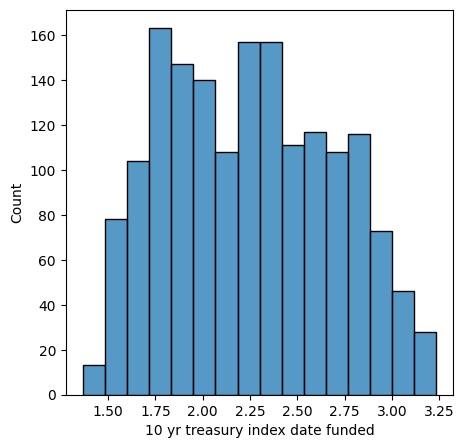

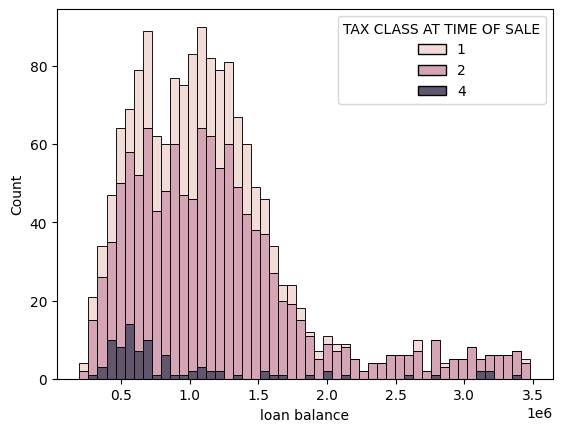

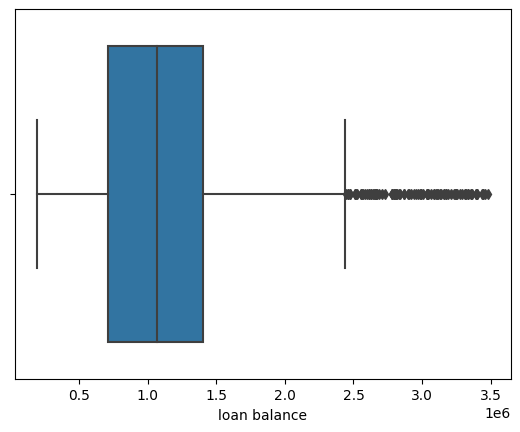

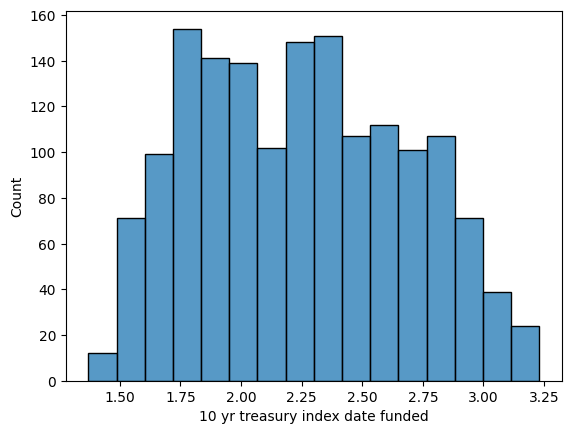

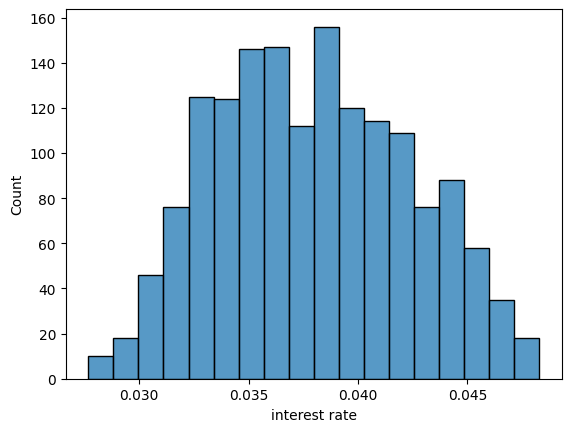

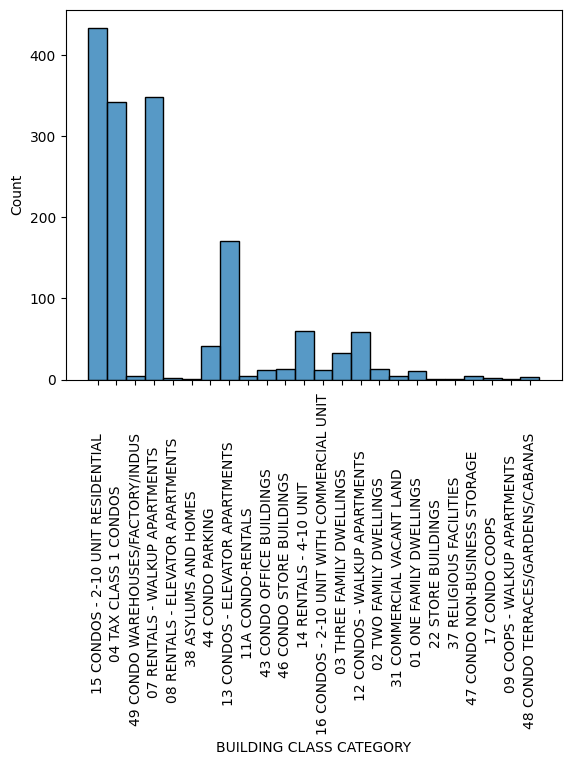

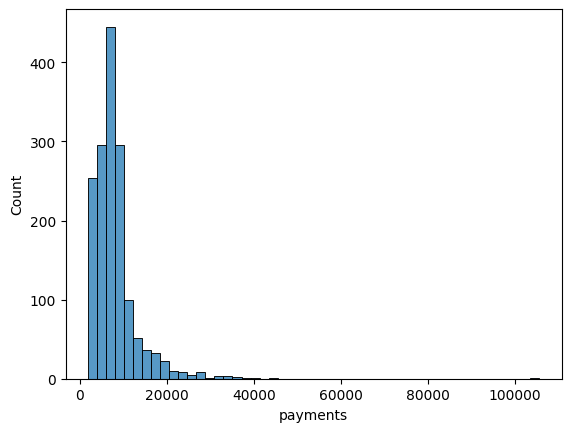

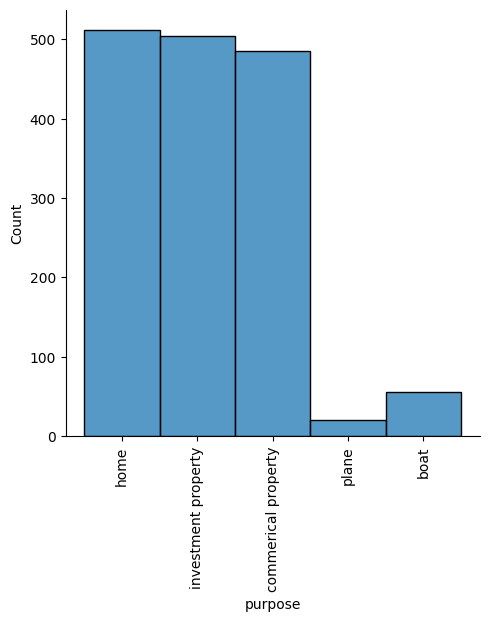

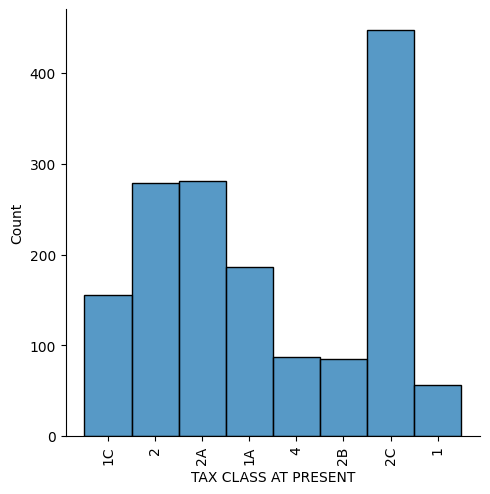

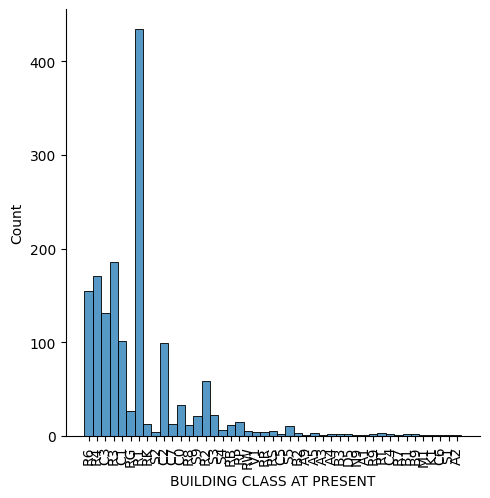

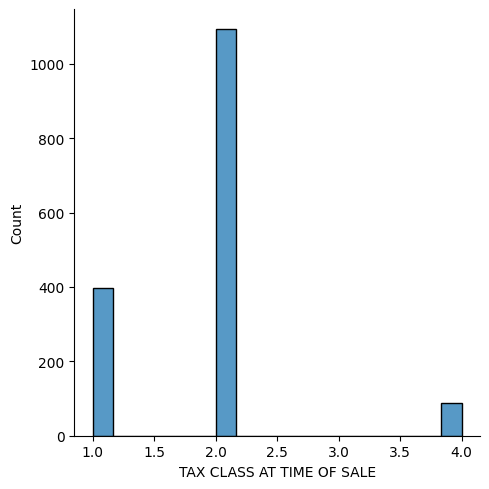

<Figure size 1000x1000 with 0 Axes>

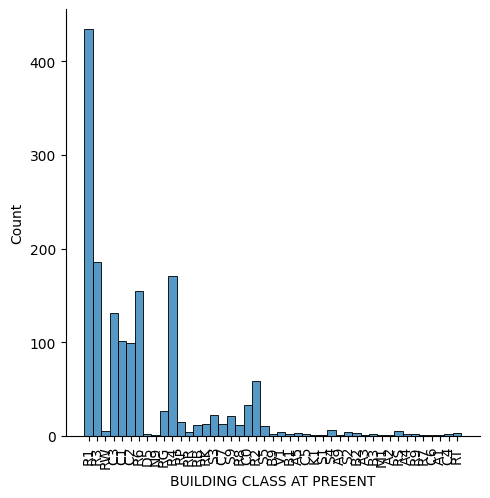

In [20]:
%run 01_luxury_loan_amount(monovariable_analysis).ipynb

In [13]:
#BUILDING CLASS AT PRESENT (R1) 
df_BCAT = df_processed['BUILDING CLASS AT PRESENT']=='R1'
df_BCAT_1 = df_processed[df_BCAT]
df_BCAT_1

,funded_amount,funded_date,duration years,duration months,10 yr treasury index date funded,interest rate,payments,total past payments,loan balance,property value,purpose,title,employment length,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE
0,790000.0,2012-04-27,20,240,1.9600,0.03359,4524.65,92,373732.18,930250.0,boat,Vice President Global Field Services,6,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,R1,1,0,0,2
3,1079000.0,2012-02-23,20,240,1.9900,0.03389,6196.40,94,496538.75,1402450.0,boat,Vice presiden,17,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,R1,1,0,0,2
6,630000.0,2017-12-07,15,180,2.3700,0.03669,4556.23,24,520650.57,667750.0,boat,Field CTO,1,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,R1,1,0,0,2
7,795000.0,2017-10-06,20,240,2.3589,0.03758,4716.77,26,672363.91,895850.0,boat,vp of Sourcing and Supply Chain,11,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,R1,1,0,0,2
8,2004000.0,2019-10-12,15,180,1.7600,0.03058,13895.23,2,1976209.55,2068050.0,boat,Vice Presiden,5,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,R1,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,448000.0,2017-02-07,30,360,2.3931,0.03993,2137.01,34,375341.56,560900.0,home,director of accounts,12,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,R1,1,0,0,2
1656,1580000.0,2014-01-16,15,180,2.8600,0.04158,11812.56,71,741307.98,1808800.0,plane,Physician,10,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,R1,1,0,0,2
1665,649000.0,2017-08-03,20,240,2.2212,0.03621,3804.42,28,542476.34,813050.0,plane,Associate,12,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,R1,1,0,0,2
1670,2052000.0,2015-11-08,15,180,2.3400,0.03638,14808.84,49,1326366.60,2187750.0,plane,VP,3,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,R1,1,0,0,2


In [24]:
df_numerical = df_processed_by_date[['funded_amount', 'duration months', '10 yr treasury index date funded', 'interest rate', 'total past payments', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'TAX CLASS AT TIME OF SALE', 'property value', 'loan balance']]
df_numerical

,funded_amount,duration months,10 yr treasury index date funded,interest rate,total past payments,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE,property value,loan balance
1585,468000.0,360,1.89,0.03490,96,0.0,0.0,1,734100.0,266503.91
172,4191000.0,360,1.89,0.03486,95,0.0,0.0,2,4337050.0,2406261.05
522,1690000.0,360,1.89,0.03488,95,0.0,0.0,2,1956050.0,970133.77
716,1560000.0,360,1.97,0.03568,95,0.0,0.0,2,1766000.0,888877.63
1607,560000.0,360,2.00,0.03599,95,1469.0,2900.0,2,705950.0,318158.57
...,...,...,...,...,...,...,...,...,...,...
1126,1270000.0,180,1.92,0.03219,0,0.0,0.0,1,1390550.0,1270000.00
1304,1120000.0,360,1.90,0.03499,0,2600.0,3280.0,2,1120350.0,1120000.00
1014,1330000.0,360,1.90,0.03499,0,0.0,0.0,2,1510300.0,1330000.00
1451,920000.0,360,1.88,0.03479,0,3124.0,4620.0,2,920250.0,920000.00


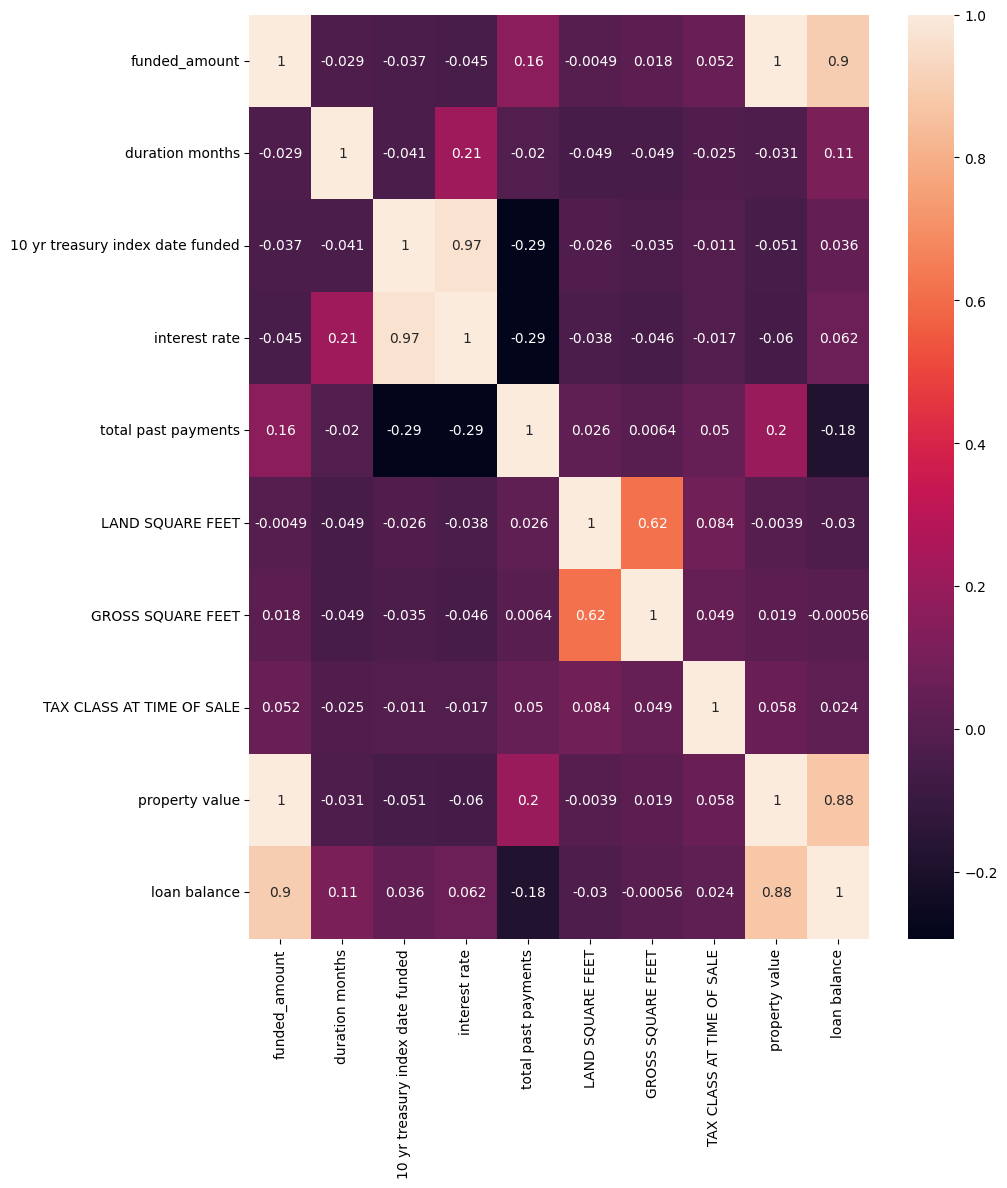

In [25]:
plt.figure(figsize=(10,12))
df_numerical.corr()
sns.heatmap(df_numerical.corr(),annot=True)
plt.show()

([0, 1, 2, 3, 4],
 [Text(0, 0, 'boat'),
  Text(1, 0, 'investment property'),
  Text(2, 0, 'commerical property'),
  Text(3, 0, 'home'),
  Text(4, 0, 'plane')])

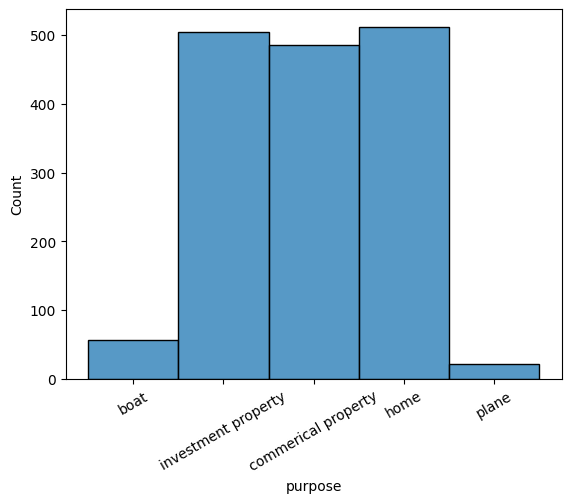

In [26]:
sns.histplot(data= df_processed, x = 'purpose')
plt.xticks(rotation = 30)

In [29]:
df_processed_by_date

,funded_amount,funded_date,duration years,duration months,10 yr treasury index date funded,interest rate,payments,total past payments,loan balance,property value,purpose,title,employment length,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE
1585,468000.0,2012-01-01,30,360,1.89,0.03490,2098.92,96,266503.91,734100.0,home,Sales Manager,13,04 TAX CLASS 1 CONDOS,1C,R6,1,0.0,0.0,1
172,4191000.0,2012-01-02,30,360,1.89,0.03486,18786.73,95,2406261.05,4337050.0,home,VP Sales,16,13 CONDOS - ELEVATOR APARTMENTS,2,R4,1,0.0,0.0,2
522,1690000.0,2012-01-02,30,360,1.89,0.03488,7577.54,95,970133.77,1956050.0,home,Partner,10,13 CONDOS - ELEVATOR APARTMENTS,2,R4,1,0.0,0.0,2
716,1560000.0,2012-01-03,30,360,1.97,0.03568,7064.45,95,888877.63,1766000.0,home,EXECUTIVE VICE PRESIDENT,11,13 CONDOS - ELEVATOR APARTMENTS,2,R4,1,0.0,0.0,2
1607,560000.0,2012-01-04,30,360,2.00,0.03599,2545.70,95,318158.57,705950.0,investment property,general manager,15,07 RENTALS - WALKUP APARTMENTS,2A,C3,4,1469.0,2900.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126,1270000.0,2019-12-21,15,180,1.92,0.03219,8904.77,0,1270000.00,1390550.0,investment property,President,16,04 TAX CLASS 1 CONDOS,1C,R6,1,0.0,0.0,1
1304,1120000.0,2019-12-25,30,360,1.90,0.03499,5028.68,0,1120000.00,1120350.0,investment property,Account Manager,1,07 RENTALS - WALKUP APARTMENTS,2A,C3,4,2600.0,3280.0,2
1014,1330000.0,2019-12-26,30,360,1.90,0.03499,5971.55,0,1330000.00,1510300.0,investment property,Director of Accounting,5,12 CONDOS - WALKUP APARTMENTS,2,R2,1,0.0,0.0,2
1451,920000.0,2019-12-27,30,360,1.88,0.03479,4120.43,0,920000.00,920250.0,commerical property,Executive Director,5,07 RENTALS - WALKUP APARTMENTS,2B,C1,9,3124.0,4620.0,2


<Axes: xlabel='funded_amount', ylabel='loan balance'>

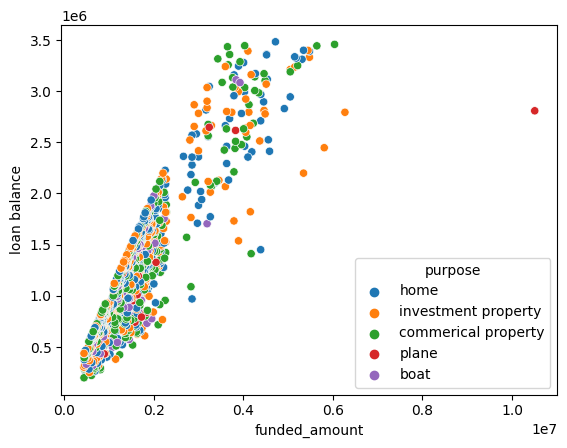

In [39]:
sns.scatterplot(data = df_processed_by_date, x = 'funded_amount', y= 'loan balance',hue = 'purpose')

In [42]:
df_plane_0 = df_processed_by_date['purpose'] == 'plane'
df_plane = df_processed_by_date[df_plane_0]
df_plane.head(5)

,funded_amount,funded_date,duration years,duration months,10 yr treasury index date funded,interest rate,payments,total past payments,loan balance,property value,purpose,title,employment length,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE
1653,1380000.0,2012-02-14,20,240,1.92,0.03319,7875.69,94,639685.24,1643900.0,plane,Director of Sales,6,07 RENTALS - WALKUP APARTMENTS,2,C1,16,4850.0,15360.0,2
1671,580000.0,2012-09-14,20,240,1.88,0.03279,3298.27,87,293050.18,833250.0,plane,Officer,10,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,R1,1,0.0,0.0,2
1673,528000.0,2012-11-10,20,240,1.61,0.03009,2930.65,85,278894.35,778400.0,plane,franchise owner,3,04 TAX CLASS 1 CONDOS,1C,R6,1,0.0,0.0,1
1658,805000.0,2013-04-04,20,240,1.78,0.03179,4536.99,80,442040.97,928150.0,plane,Senior Associate,4,12 CONDOS - WALKUP APARTMENTS,2,R2,1,0.0,0.0,2
1669,1830000.0,2013-10-19,15,180,2.60,0.03898,13442.94,74,835222.45,2063250.0,plane,vice president,1,12 CONDOS - WALKUP APARTMENTS,2,R2,1,0.0,0.0,2
